# CAR ADS Dataset

## Importing required libraries

Firstly, importing the required libraries for loading, preprocessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
import scipy 
%matplotlib inline

## Loading the dataset
The data was scraped from several websites in Czech Republic and Germany over a period of more than a year. Consisting of following features

__Feature description__ 

- maker - Company (categorical)
- model - Model of the car (categorical)
- mileage - in KM (numerical)
- manufacture_year - (date)
- engine_displacement - in ccm (numerical)
- engine_power - in kW (numerical)
- body_type - almost never present, but I scraped only personal cars, no motorcycles or utility vehicles (categorical)
- color_slug - also almost never present (categorical)
- stk_year - year of the last emission control (date)
- transmission - automatic or manual (binary categorical)
- door_count - (numerical)
- seat_count - (numerical)
- fuel_type - gasoline, diesel, cng, lpg, electric (categorical)
- date_created - when the ad was scraped (date-time)
- datelastseen - when the ad was last seen. Policy was to remove all ads older than 60 days (date-time)
- price_eur - list price converted to EUR (numerical)

In [2]:
# Car_ads_dataset consists of 3.5 million samples with 16 features

car_ads_dataframe = pd.read_csv('../ml/data/external/personal-cars-classifieds/all_anonymized_2015_11_2017_03.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
car_ads_dataframe.head(5)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71


## Data exploration
This part consist of variable identification(data type of variables), Finding the amount of missing values.

First, let's look at the Pandas ```.info()``` to gain insight on the datatypes and No.of samples present in the dataset.

In [4]:
car_ads_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


Next, using ```.describe()```, the mean, median, standard deviation for the numerical value is easily seen. Also, for categorical variable, the no.of unique labels, highest frequency can be seen.

In [5]:
car_ads_dataframe.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [6]:
car_ads_dataframe.describe(include='object')

,maker,model,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen
count,3033997,2419551,2429998,209501,1844756,2811282,2938539.0,2803423.0,1705306,3552912,3552912
unique,46,1012,9,14,298,2,26.0,88.0,5,3552912,3355057
top,skoda,octavia,other,black,None,man,5.0,5.0,gasoline,2015-12-02 16:16:20.081894+00,2016-01-27 20:40:15.46361+00
freq,313830,129563,1964289,42931,1308651,2021990,777522.0,1084557.0,902222,1,197856


Let's list the unique labels of each variable and briefly scan through them all.

In [7]:
# listing the unique labels in each column
for cols in car_ads_dataframe.columns:
    if car_ads_dataframe[cols].dtypes == 'object':
        car_ads_dataframe[cols].astype('str')
        print(car_ads_dataframe[cols].value_counts())

skoda            313830
volkswagen       297256
bmw              266731
mercedes-benz    251966
audi             248602
ford             240556
opel             217708
fiat             132669
citroen          121913
renault          106831
peugeot           92130
hyundai           80602
seat              74645
toyota            72908
nissan            68008
kia               48607
volvo             48271
mazda             45666
mini              35678
smart             32918
suzuki            31184
mitsubishi        28463
honda             26225
porsche           24317
chevrolet         20856
rover             20611
jeep              17075
lancia            13759
subaru            10107
jaguar            10056
chrysler           9296
dodge              5223
alfa-romeo         4734
lexus              3911
dacia              2024
maserati           1912
land-rover         1721
isuzu              1427
bentley            1081
hummer              731
lamborghini         554
infinity        

3552912 observations with 15 features and target ```price_eur```. The features ```seat_count``` and ```door_count``` should be numerical values.(Requires changing the datatype).

### Changing the data type

Some of the datatype seems to improper. Let's change them into proper datatype.

In [8]:
# Changing the datatype of seat_count, stk_year and door_count features
car_ads_dataframe['seat_count'] = car_ads_dataframe['seat_count'].replace({'None': np.nan})
car_ads_dataframe['door_count'] = car_ads_dataframe['door_count'].replace({'None': np.nan})
car_ads_dataframe['stk_year'] = car_ads_dataframe['stk_year'].replace({'None': np.nan})
car_ads_dataframe[["seat_count", "door_count", 'stk_year']] = car_ads_dataframe[["seat_count", "door_count", 'stk_year']].apply(pd.to_numeric)

In [43]:
# keeping only the dates and removing the time and Changing to date/time datatype.
car_ads_dataframe['date_created'] = pd.to_datetime(car_ads_dataframe['date_created'].apply(lambda x: x.split()[0]))
car_ads_dataframe['date_last_seen'] = pd.to_datetime(car_ads_dataframe['date_last_seen'].apply(lambda x: x.split()[0]))

AttributeError: 'Timestamp' object has no attribute 'split'

### Insight on missing data

Let's print out the number of missing data and the percent of missing data present of each feature

In [10]:
# let's get the count of missing values in each dataset
car_ads_dataframe.isnull().sum().sort_values(ascending=False)

color_slug             3343411
stk_year               3016807
fuel_type              1847606
seat_count             1287099
model                  1133361
body_type              1122914
door_count             1090066
engine_displacement     743414
transmission            741630
engine_power            554877
maker                   518915
manufacture_year        370578
mileage                 362584
price_eur                    0
date_last_seen               0
date_created                 0
dtype: int64

In [11]:
# percentage of missing data
car_ads_dataframe.apply(lambda x: sum(x.isnull())/len(x)).sort_values(ascending=False)

color_slug             0.941034
stk_year               0.849108
fuel_type              0.520026
seat_count             0.362266
model                  0.318995
body_type              0.316055
door_count             0.306809
engine_displacement    0.209241
transmission           0.208739
engine_power           0.156175
maker                  0.146053
manufacture_year       0.104303
mileage                0.102053
price_eur              0.000000
date_last_seen         0.000000
date_created           0.000000
dtype: float64

### Dropping highly unreliable features

Data with more than 70% missing value are to be removed as imputing them can result in addition of noise to the data. Let's drop the ```color_slug``` feature from the dataset.
Also, ```data_last_seen``` feature just doesn't being any important in my mind towards affecting the price of the dataset. I will also be dropping that feature.

In [12]:
# dropping color_slug feature
car_ads_dataframe.drop(['color_slug', 'date_last_seen'], axis=1, inplace=True)

## Univariate-Analysis
Following plots will be used for getting insight on dataset:
- Count Plot - for categorical features but no date/time variables, gain insight on distribution.
- Histograms - for numerical features, gain insight on distribution. 

## Count_plot

In [13]:
# Contain list of categorical features
cat_features = car_ads_dataframe.select_dtypes(include=['object']).columns

This loop was supposed to plot the count_plot in one cell but my RAM didn't support it. This is the reason why there are multiple cells for count_plot.

In [14]:
# # loop for printing the count_plot for categorical variables
# for i in cat_features:
#     fig, ax1 = plt.subplots(figsize=(24,10))
#     plot = sns.countplot(x=i, data=car_ads_dataframe, orient='h')
#     for index, item in enumerate(plot.get_xticklabels()):
#         item.set_rotation(45)

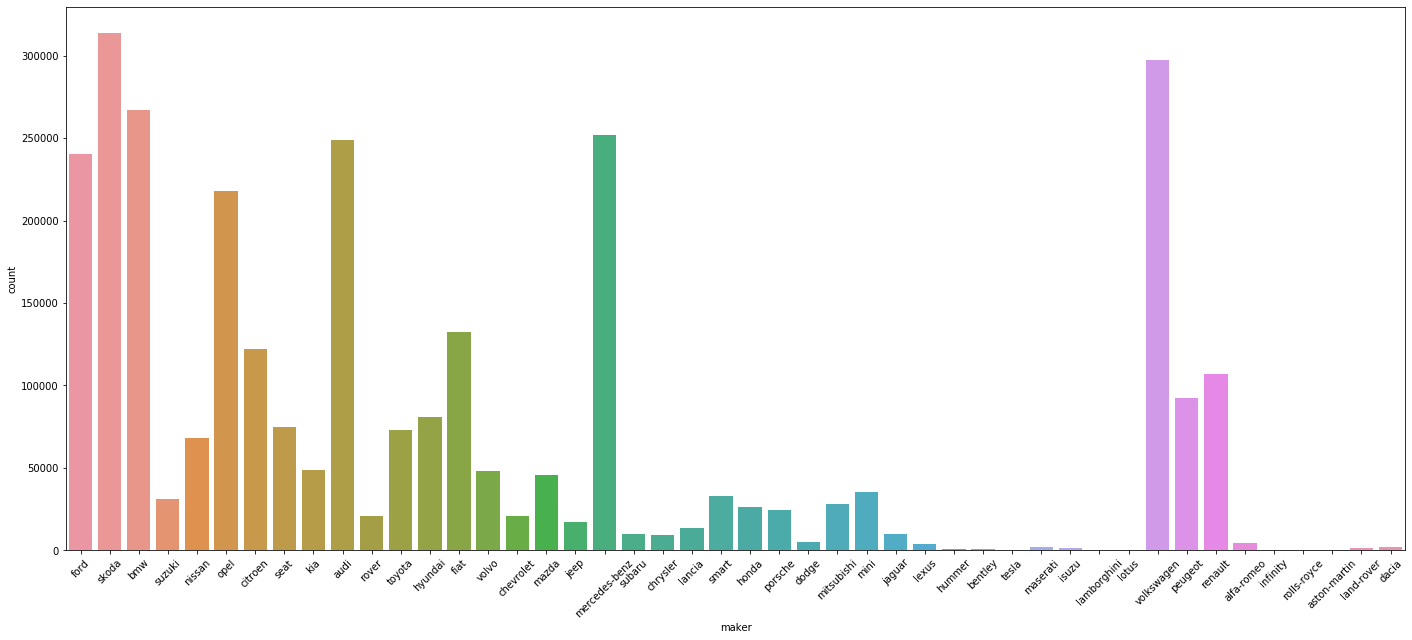

In [15]:
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.countplot(x=cat_features[0], data=car_ads_dataframe)

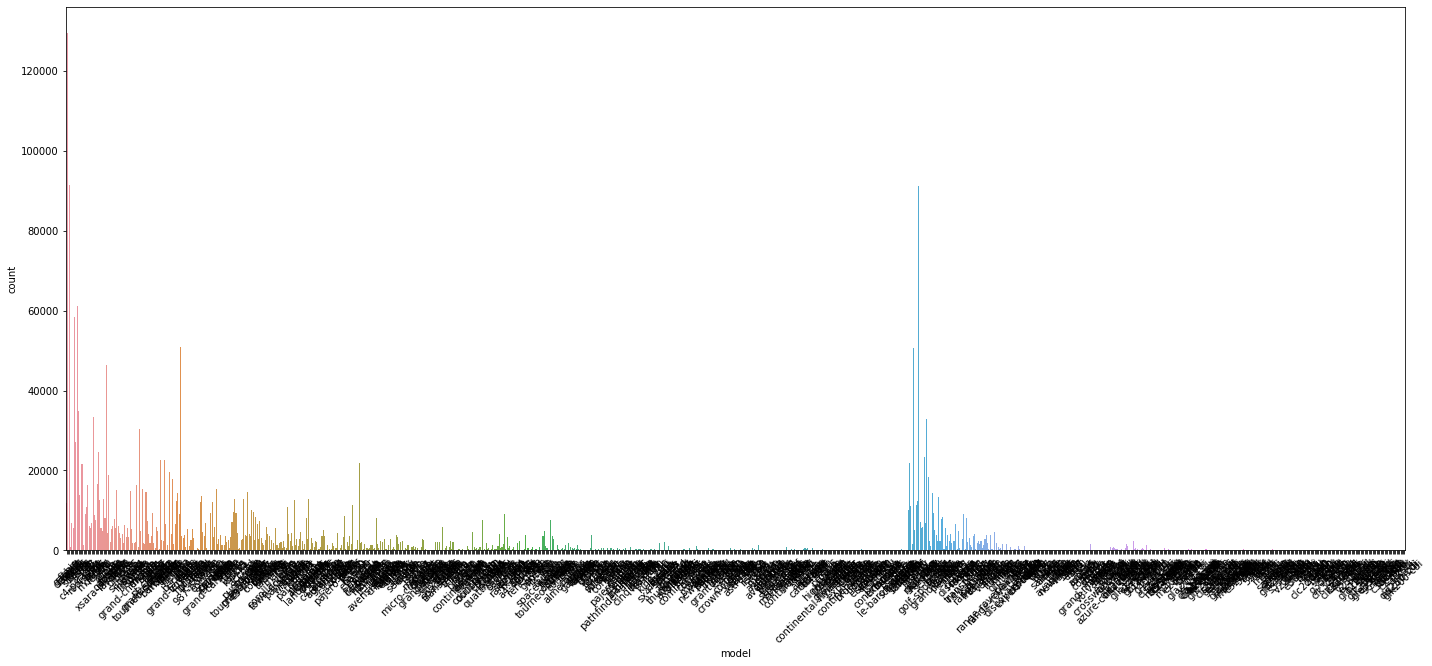

In [16]:
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.countplot(x=cat_features[1], data=car_ads_dataframe)

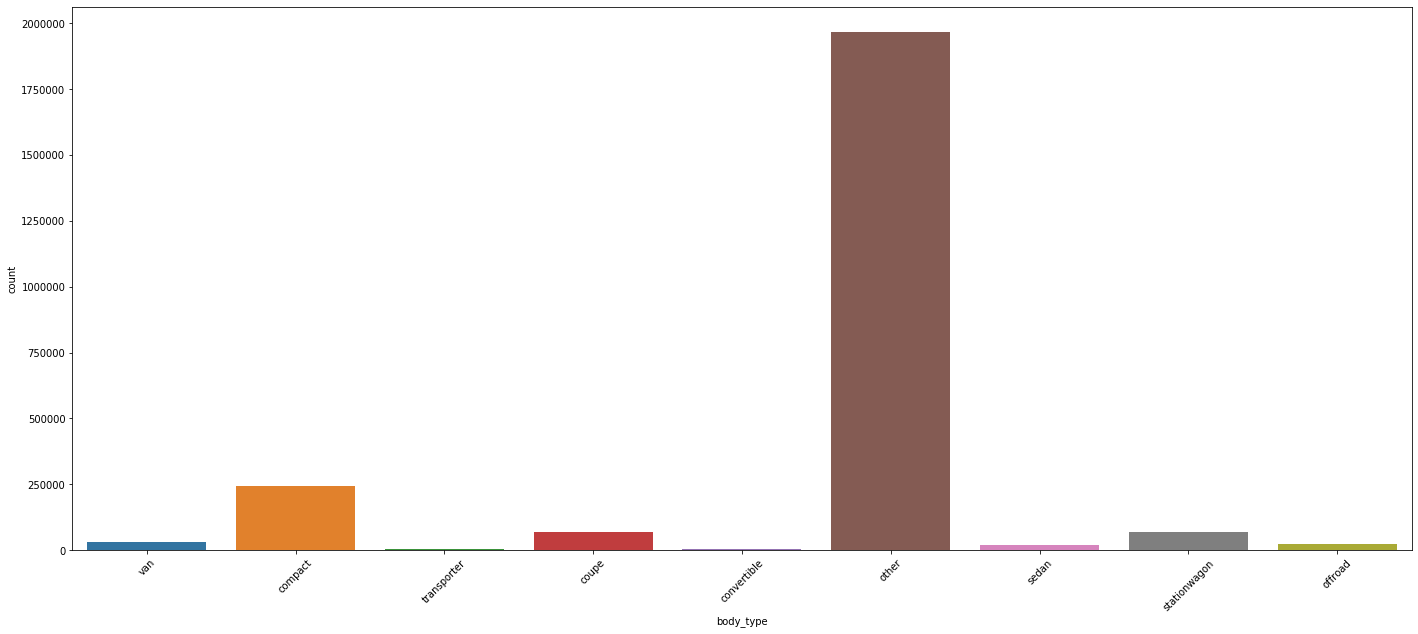

In [17]:
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.countplot(x=cat_features[2], data=car_ads_dataframe)

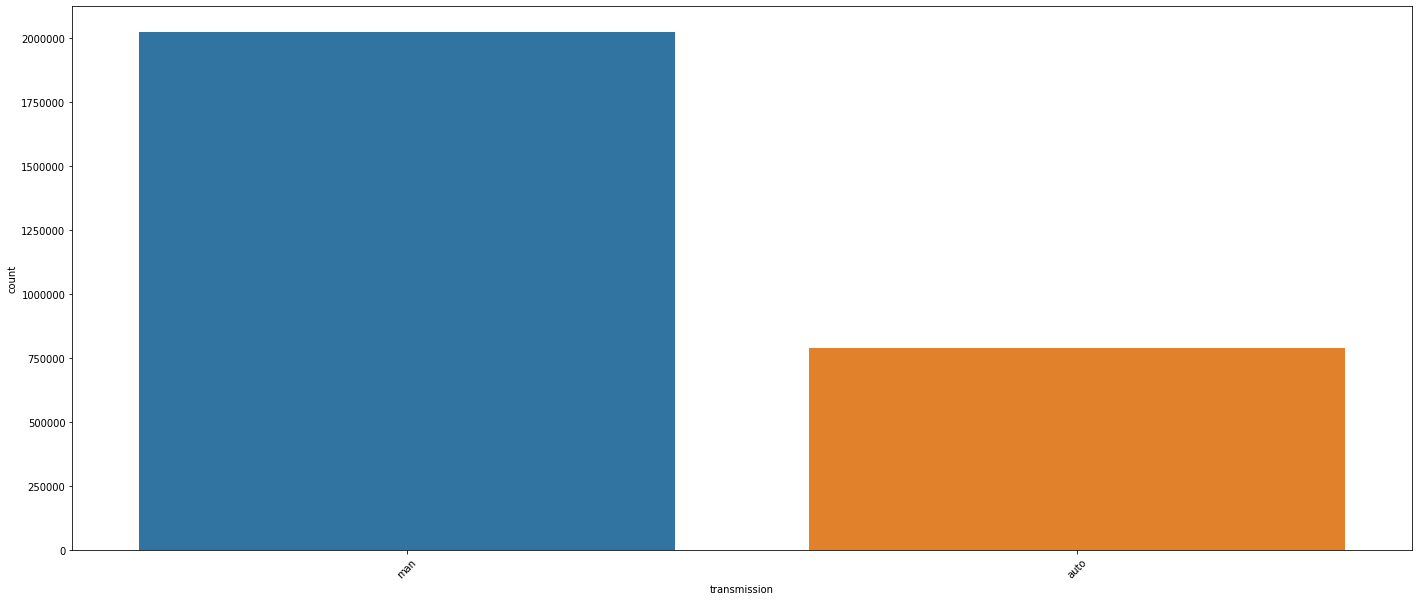

In [18]:
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.countplot(x=cat_features[3], data=car_ads_dataframe)

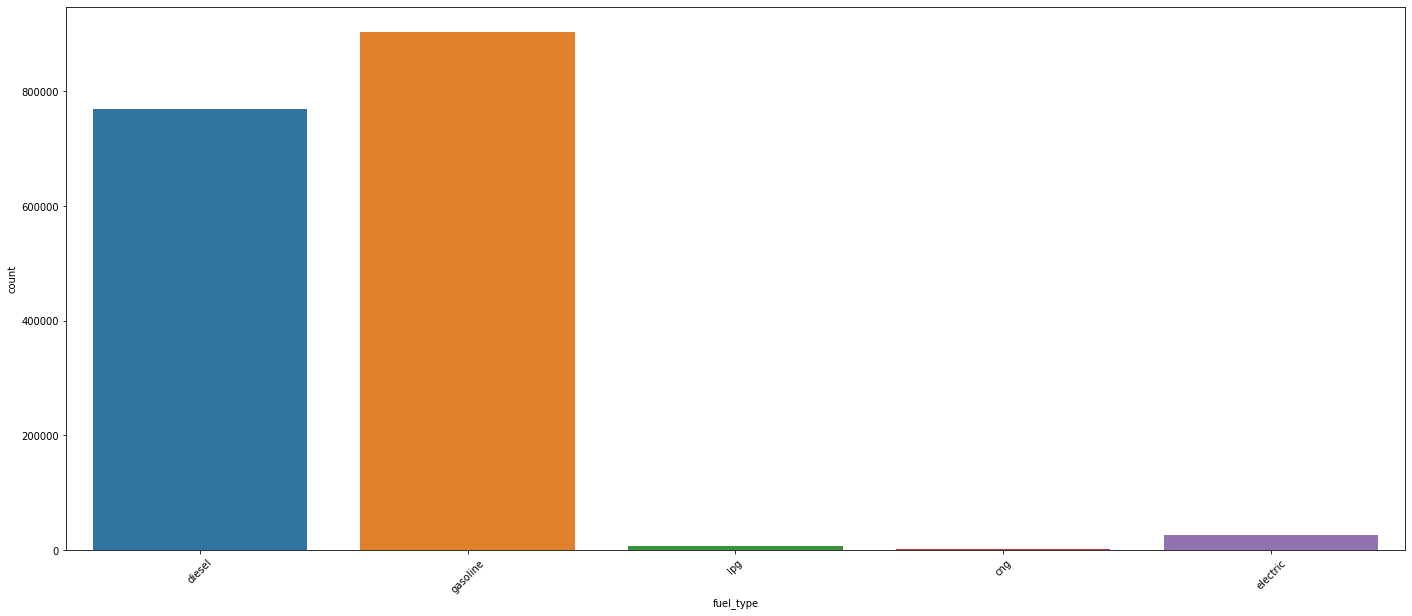

In [19]:
plt.figure(figsize=(24,10))
plt.xticks(rotation=45)
sns.countplot(x=cat_features[4], data=car_ads_dataframe)

Most of the categorical variables are skewed, consisting of multiple rarelabels. __Rare label encoding__ may be an option for ```fuel_type``` feature but not conducted.

## Histograms

Dropping ```manufacture_year, price_eur and seat_count```, seat_count results in errorneous plot.

In [20]:
num_features = car_ads_dataframe.select_dtypes(include=['float64']).columns
num_features = num_features.drop(['manufacture_year','price_eur', 'seat_count'])
num_features

Index(['mileage', 'engine_displacement', 'engine_power', 'stk_year',
       'door_count'],
      dtype='object')

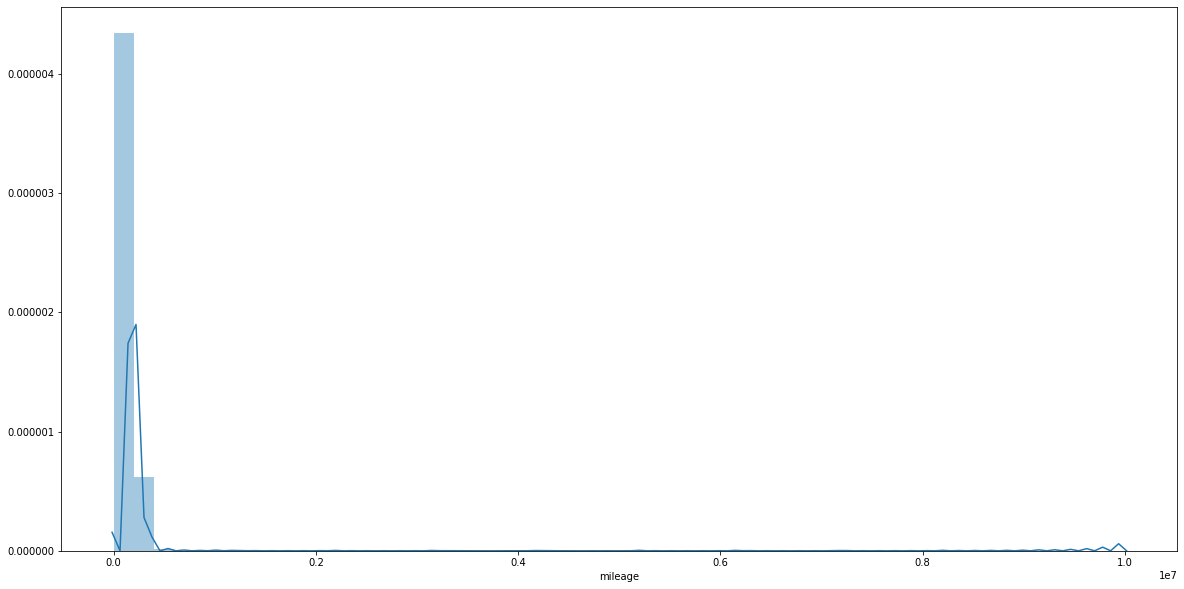

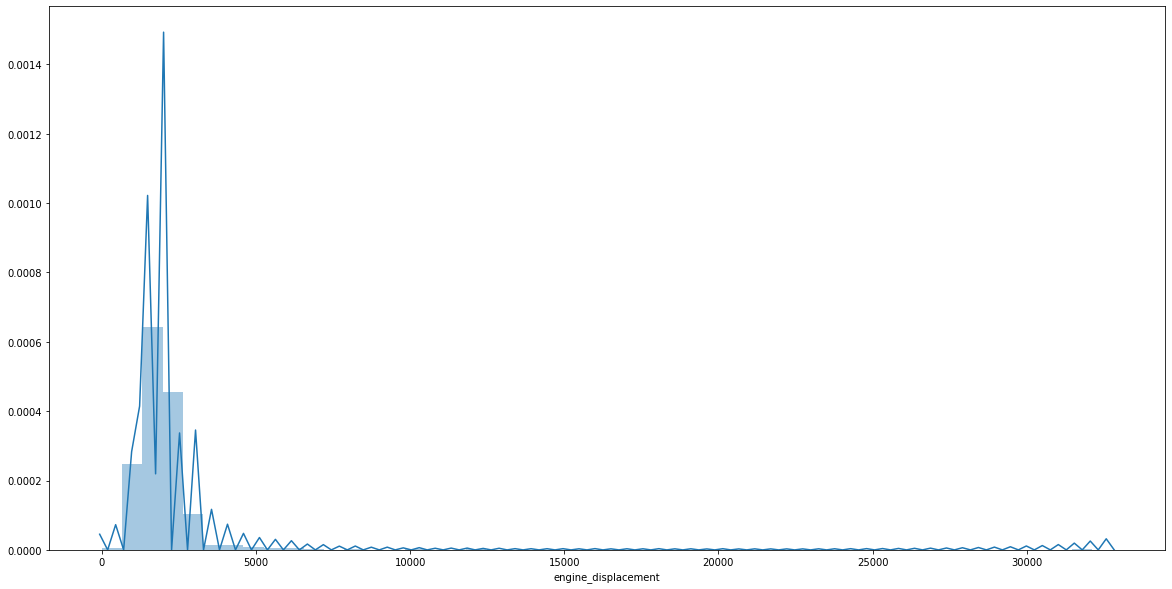

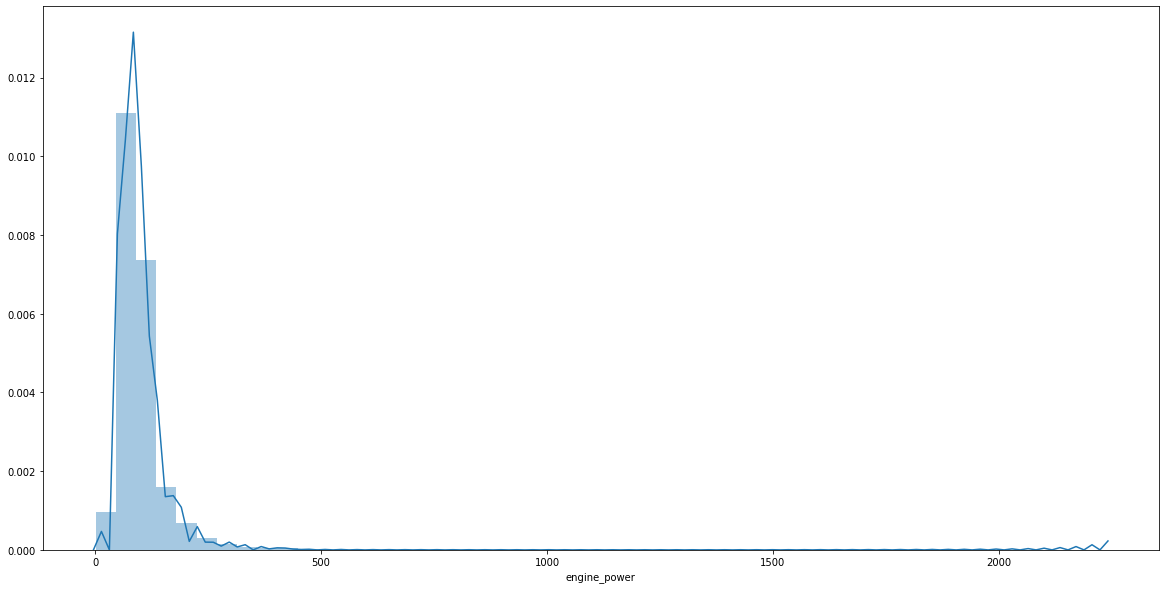

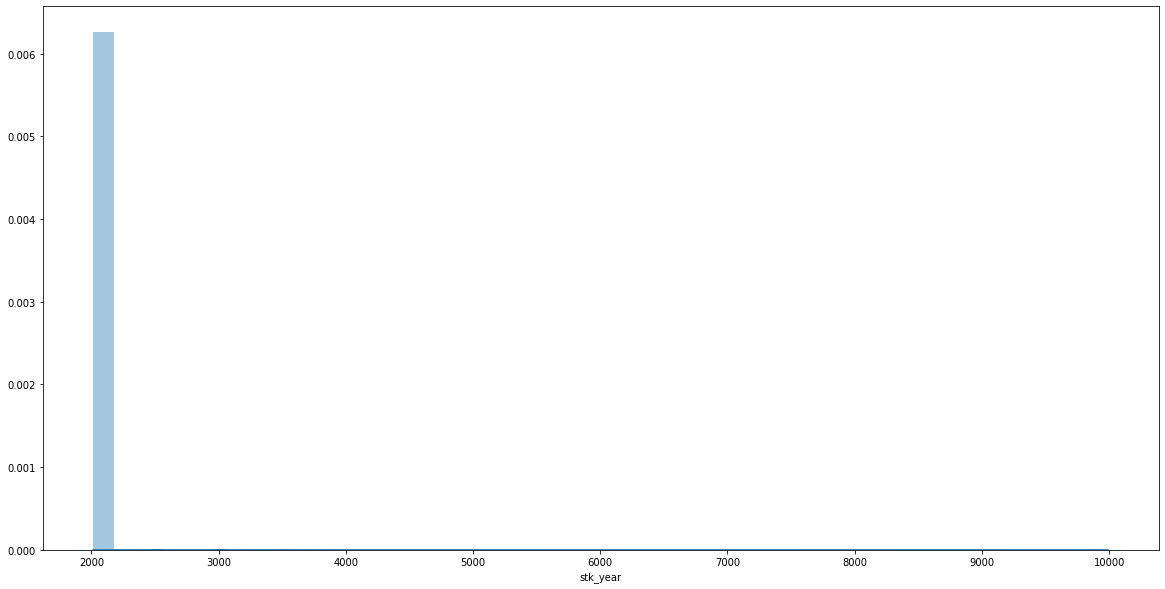

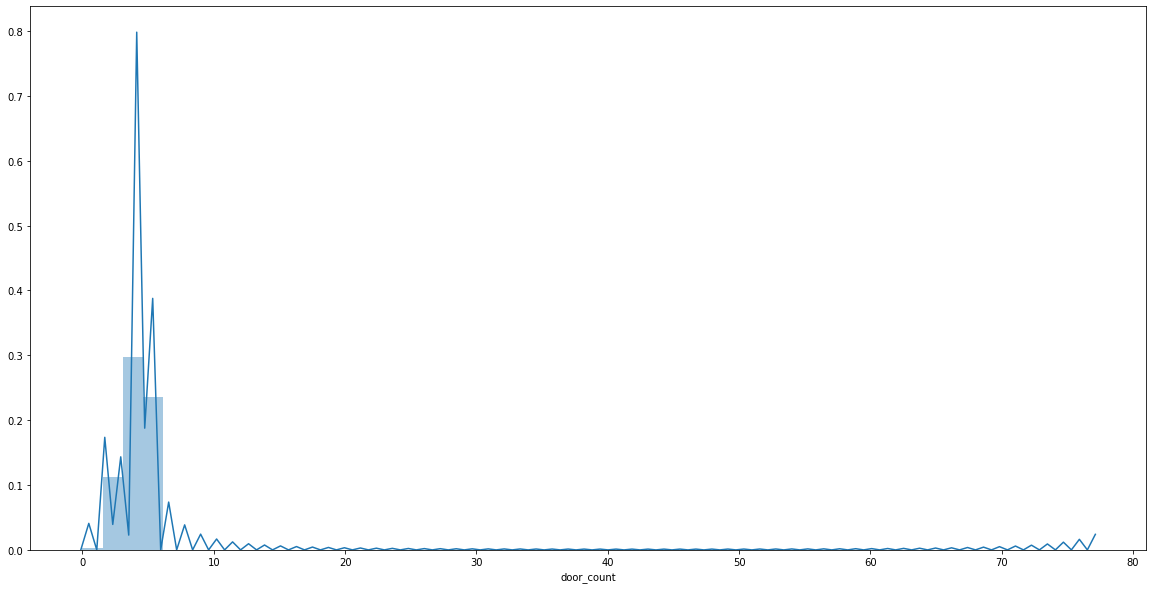

In [21]:
for i in num_features:
    plt.figure(figsize=(20,10))
    sns.distplot(car_ads_dataframe[i])

The histograms are skewed in nature. Might want to apply mathematical transformations after feature scaling by since I lacked the domain knowledge, I won't be conducting mathematical transformations.

## Bivariate analysis

### Correlation matrix

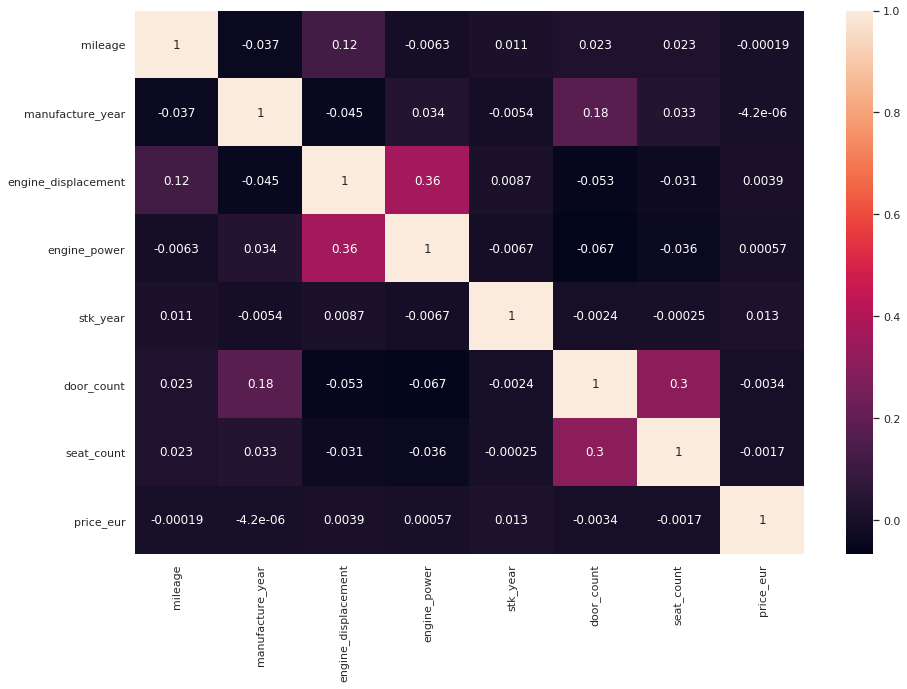

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(car_ads_dataframe.corr(), annot = True)

There is some correlation between ```door_count``` and ```seat_count```, and ```engine_power``` and ```engine_displacement```. But, there is no large correlation and any inference to be made from the correlation matrix.

There ought to be some kind of relation between ```fuel_type``` and ```transmission```. Let's check it.

In [23]:
# checking the relation between fuel_type and transmission_mode
pd.crosstab(index = car_ads_dataframe['fuel_type'], columns=car_ads_dataframe['transmission'])

transmission,auto,man
fuel_type,,
cng,114,685
diesel,220405,422153
electric,5784,4449
gasoline,141860,480686
lpg,1018,2351


Fuel_type's ```cng, diesel, gasoline, lpg``` have more manual mode of transmission than auto, while ```electrics``` ones are more automatic.

## Missing data handling

let's drop the rows of ```maker``` column as imputing those might result in huge amount of noise. Also, we have adequet amount of data remaining even after droping the null rows of ```maker``` column.

In [24]:
# dropping rows with missing value on maker feature
car_ads_dataframe = car_ads_dataframe[car_ads_dataframe['maker'].notna()]

Taking the mode value of ```model``` for each unique ```label``` and imputing missing value of ```model``` with that respect value.

In [25]:
# variable to store the Maker's label
car_makers = car_ads_dataframe['maker'].unique()

In [26]:
# Imputing the mode values of model variable
for i in car_makers:
    maker_condition = car_ads_dataframe['maker']==i
    mode_value = car_ads_dataframe['model'][maker_condition].value_counts().index[0]
    car_ads_dataframe.loc[maker_condition, 'model']=car_ads_dataframe[maker_condition]['model'].fillna(mode_value)

Other numerical values have skewed distribution, so __median imputation__ is preferred for them. ```mileage, manufacture_year, engine_power, engine_displacement, stk_year, door_count and seat_count``` are imputed using median imputation. Let's group the data by ```model and maker``` and use it to impute the data.

In [27]:
# Variable to store cols that are filled with median imputation
median_imp_cols = ['mileage', 'manufacture_year', 'engine_power', 'engine_displacement', 
                   'door_count', 'stk_year', 'seat_count']

# loop to replace missing values with median
for i in median_imp_cols:
    car_ads_dataframe[i] = car_ads_dataframe[i]\
    .fillna(car_ads_dataframe.groupby(['maker','model'])[i].transform('median'))

Now, categorical variables ```transmission, fuel_type and body_type``` will be imputed using __mode imputation__.

In [28]:
#variable to store cols that are filled with mode imputation
mode_imp_cols = ['transmission', 'body_type', 'fuel_type']

# function to return mode value
def get_mode(x):
    if x.count()<=0:
        return np.nan
    return x.value_counts().index[0]

#loop to replace missing values with mode
for i in mode_imp_cols:
    car_ads_dataframe[i] = car_ads_dataframe.groupby(['maker', 'model'])[i].transform(get_mode)
   

Finally after the imputation let's see the remaining NaN values. If any they are will be dropped.

In [29]:
# let's get the count of missing values in each dataset
car_ads_dataframe.isnull().sum()

maker                     0
model                     0
mileage                  82
manufacture_year         35
engine_displacement     205
engine_power            117
body_type                 0
stk_year               5582
transmission            118
door_count              547
seat_count              534
fuel_type               563
date_created              0
price_eur                 0
dtype: int64

In [30]:
# dropping remaining missing values
car_ads_dataframe.dropna(inplace=True)

In [31]:
# let's reset the index of the data
car_ads_dataframe.reset_index(drop=True, inplace=True)

Thats all for missing data identification and handling. Moving on to outlier detection and handling.

## Outlier detection

Plotting the __boxplot__ of the variables, we can easily look at the outlier present in the dataset. Using ```sns.boxplot```

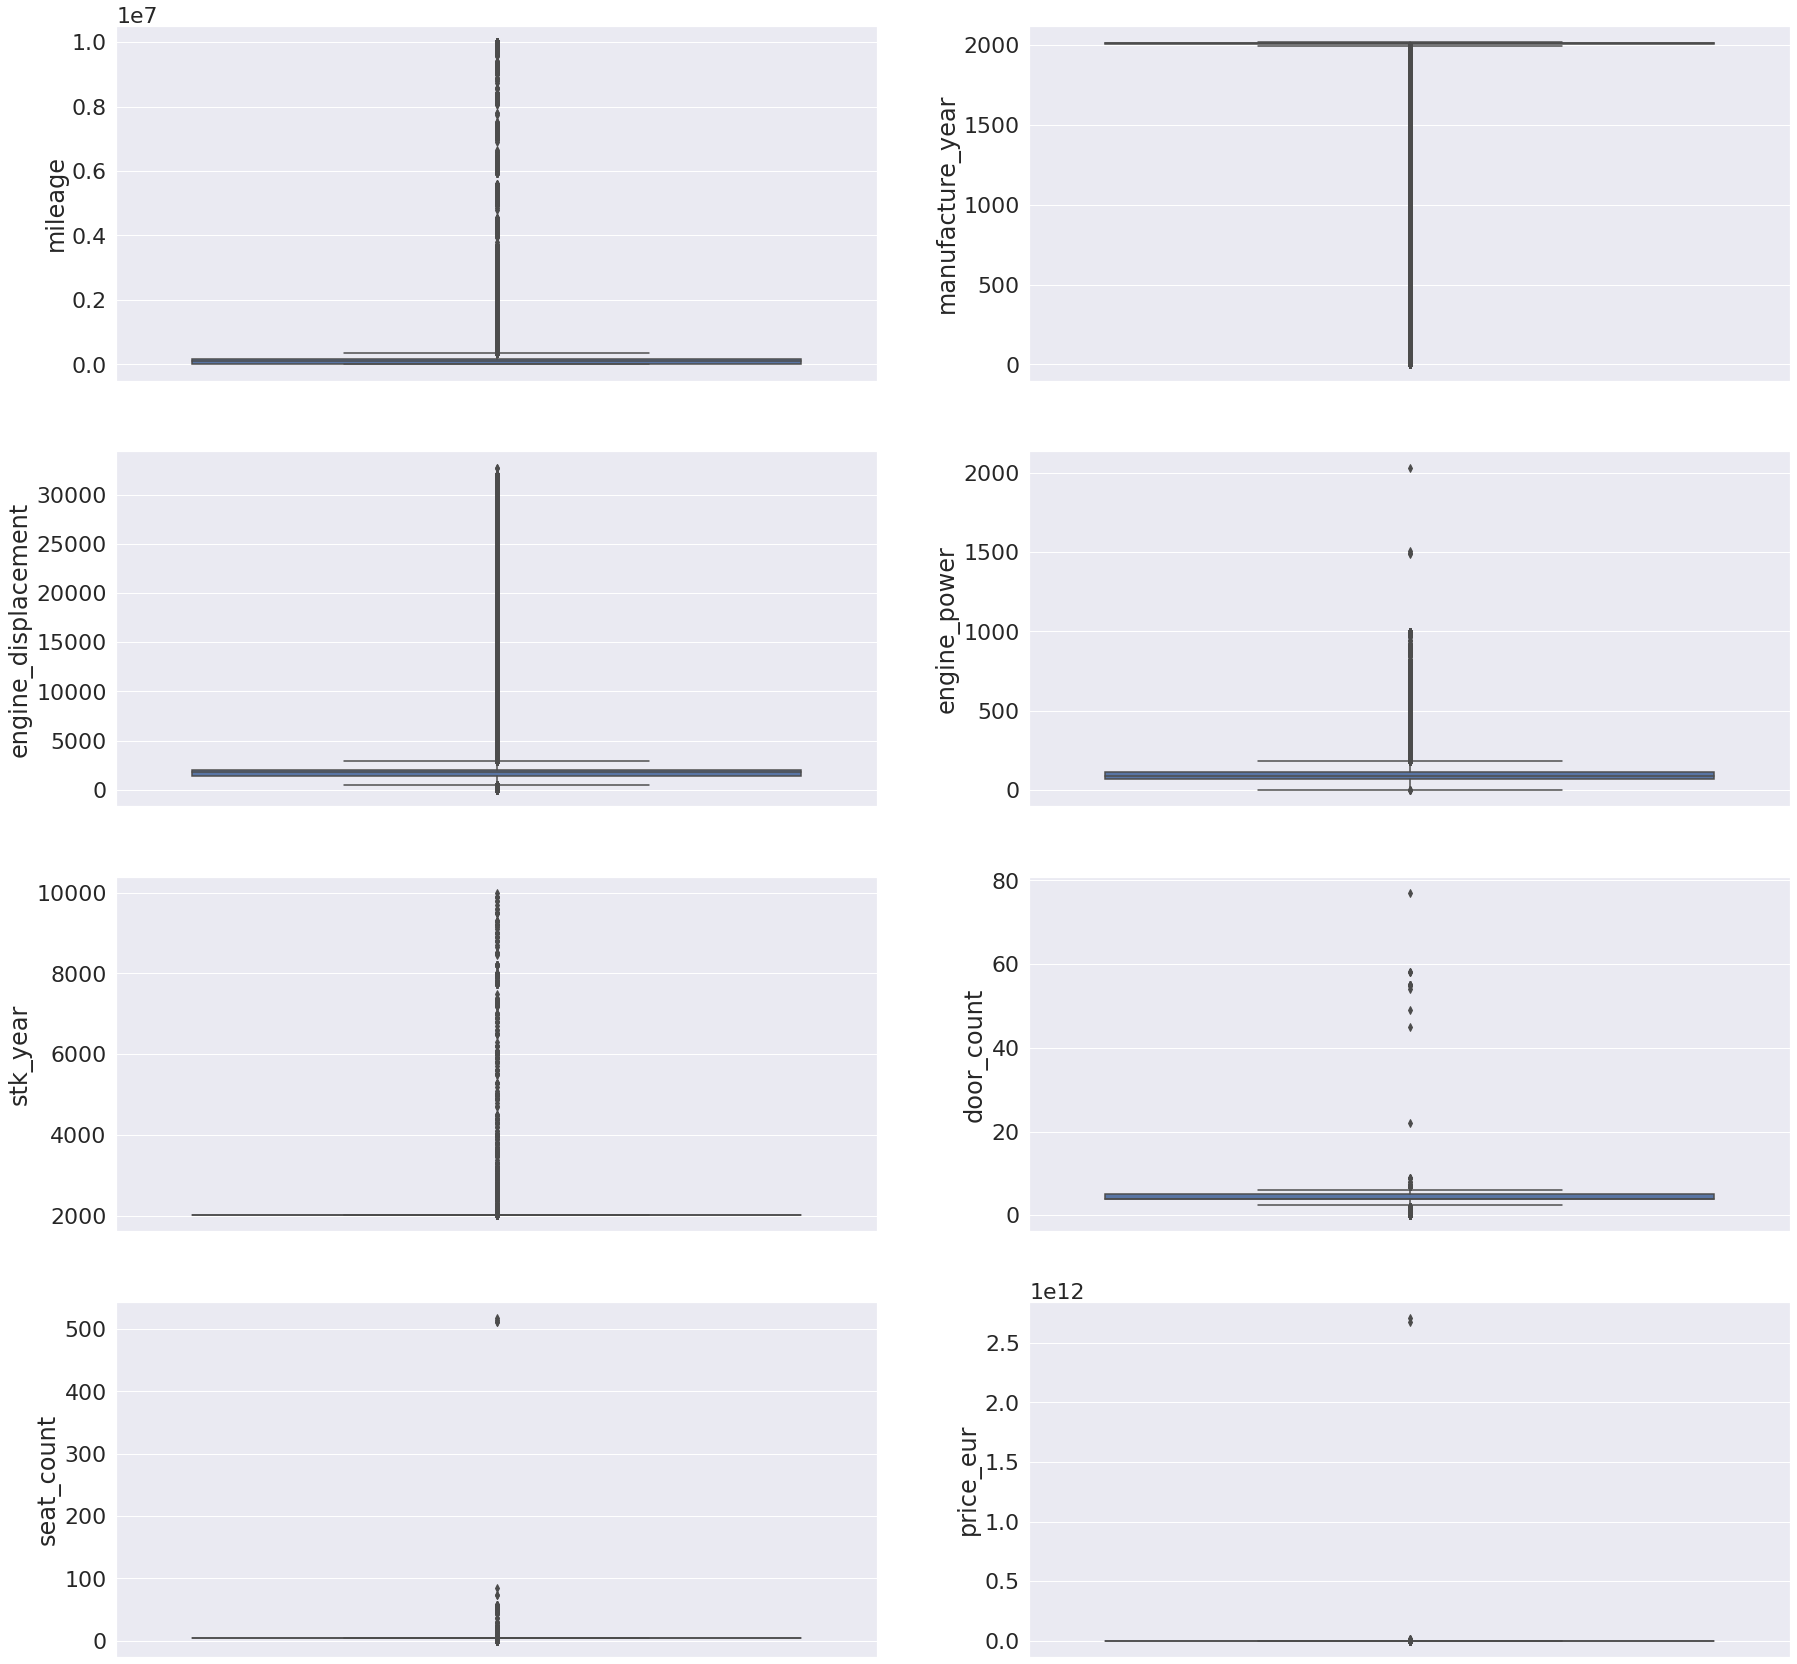

In [32]:
# plotting the box_plot for numerical features of the dataset.
j = 0
sns.set(rc={'figure.figsize':(30,30)})
sns.set(font_scale=2)
for i in car_ads_dataframe.columns:
    if car_ads_dataframe[i].dtypes=='float64':
        plt.subplot(421+j)
        sns.boxplot(x=None, y=car_ads_dataframe[i])
        plt.plot()
        j+=1

## Outlier Removal

Variable ```door_count``` and ```seat_count``` are of special interest here, as they have potential outliers which are really far apart from the regular datapoints. Other variable seem to be skewed resulting in such box-plots. Without the proper domain knowledge, I have refrained myself from messing with them.

Let's see the labels of these data to see if any extremities are present. Firstly, ```stk_year``` :

In [33]:
# values of stk_year features 
car_ads_dataframe['door_count'].value_counts()

4.0     1382697
5.0     1195790
2.0      283188
3.0      157480
0.0        6755
6.0         934
4.5         421
2.5         299
1.0         109
7.0          36
3.5          21
55.0          9
9.0           4
58.0          3
8.0           2
77.0          1
22.0          1
45.0          1
49.0          1
54.0          1
Name: door_count, dtype: int64

Since, I havent seen any land transport with more than a single digit number of door, I have a hypothesis that they clearly must be a error on data entry. Let's remove the sample containing that particular value. Also how can their be ```0.0, 4.5, 3.5``` doors in a vehicle, let's fix that as well.

In [34]:
# dropping the errorneous value of stk_year feature
car_ads_dataframe = car_ads_dataframe[car_ads_dataframe['door_count'] < 10.0]

#replacing values of unusual entries
car_ads_dataframe['door_count'].replace({0.0:4.0, 4.5:4, 3.5: 3}, inplace=True)

Now, let's look at the ```seat_count``` 

In [35]:
# values of seat_count features 
car_ads_dataframe['seat_count'].value_counts()

5.0      2453534
4.0       298908
7.0       116017
2.0        78146
3.0        38554
6.0        16797
9.0         9625
0.0         9189
8.0         6470
1.0          192
4.5           59
17.0          31
10.0          30
12.0          28
15.0          19
18.0          15
21.0          12
14.0          11
45.0          11
11.0           8
13.0           8
16.0           7
20.0           7
58.0           6
56.0           5
7.5            5
19.0           5
51.0           4
54.0           4
50.0           3
74.0           2
512.0          2
36.0           2
30.0           2
55.0           2
53.0           2
52.0           2
24.0           2
23.0           2
29.0           1
25.0           1
57.0           1
43.0           1
517.0          1
515.0          1
22.0           1
85.0           1
Name: seat_count, dtype: int64

Have you ever seen cars/bikes having more than 100 seats?? I will remove all the vehicle with more than 100 seats.

In [36]:
car_ads_dataframe = car_ads_dataframe[car_ads_dataframe['seat_count'] <= 100.0]

## Feature transformation

### Categorical Encoding
First, encode the categorical variables into numerical representation, such that the features are properly formatted for the input.

- One-Hot encoding for lower cardinality i.e. ```Fuel_type and Transmission```
- Label encoding for high cardinality.(other remaining categorical variables).

In [37]:
# import transformer for feature transformation
from sklearn.preprocessing import LabelEncoder

# Variables to store the encoders
label_enc = LabelEncoder()

In [38]:
# performing label encoding on three high cardinality categorical variables

for i in ['maker', 'model', 'body_type']:
    car_ads_dataframe[i] = label_enc.fit_transform(car_ads_dataframe[i])

In [39]:
# one-hot encoding for the other two categorical features and dropping the column
for i in ['fuel_type', 'transmission']:
    car_ads_dataframe = pd.concat([car_ads_dataframe,pd.get_dummies(car_ads_dataframe[i],drop_first=True)],axis=1)
    car_ads_dataframe.drop([i],axis=1, inplace=True)

### Feature Scaling

Let's use ```robust scaler``` for transforming the numerical variables. This is the choice of scaling technique due to presence of large amount of outlier in the datset.

Conducted on ```'mileage', 'engine_displacement', 'engine_power', 'door_count', 'seat_count'```

In [40]:
# Robust scaling
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()
#variable to store numerical features
numerical_columns = ['mileage', 'engine_displacement', 'engine_power', 'door_count', 'seat_count']

#Transformed dataset
car_ads_dataframe[numerical_columns] = rob_scaler.fit_transform(car_ads_dataframe[numerical_columns])

In [41]:
# Let's have one last glance at the dataset we have formed using EDA.
car_ads_dataframe

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,stk_year,door_count,seat_count,date_created,price_eur,electric,gasoline,lpg,man
0,10,368,0.424925,2011.0,0.338358,0.333333,3,2017.0,1.0,2.0,2015-11-14,10584.75,0,0,0,1
1,36,532,0.368413,2012.0,0.338358,-0.155556,3,2017.0,1.0,0.0,2015-11-14,8882.31,0,0,0,1
2,3,761,0.024414,2010.0,0.329983,-0.066667,3,2017.0,1.0,0.0,2015-11-14,12065.06,0,0,0,1
3,36,346,0.131775,2004.0,-1.001675,-0.911111,3,2018.0,1.0,0.0,2015-11-14,2960.77,0,1,0,1
4,36,346,0.258829,2004.0,-1.001675,-0.911111,3,2018.0,1.0,0.0,2015-11-14,2738.71,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027748,36,601,-0.303632,2013.0,-1.001675,-0.555556,3,2017.0,1.0,0.0,2017-03-16,1295.34,0,1,0,1
3027749,36,348,0.387370,2000.0,-0.834171,-0.844444,3,2017.0,1.0,0.0,2017-03-16,1295.34,0,1,0,1
3027750,36,532,1.018285,2006.0,0.170854,0.266667,3,2017.0,1.0,0.0,2017-03-16,1295.34,0,0,0,1
3027751,36,346,0.100146,2001.0,-0.927973,-0.733333,3,2018.0,1.0,0.0,2017-03-16,1295.34,0,1,0,1


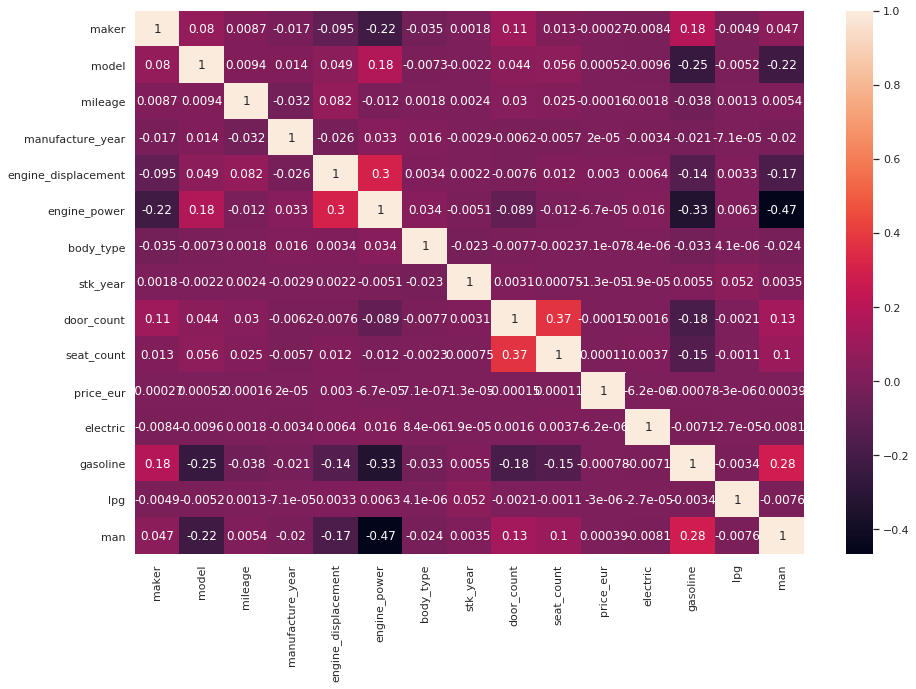

In [42]:
# Finally the correlation matrix to seek for highly correlated independent variable and remove them.
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(car_ads_dataframe.corr(), annot = True)

Since, there aren't any highly correlated independent variable. I have decided not to remove any features from the dataset. This is the end of EDA on car_ads_dataset.

Also, lack of proper hardware and time resource is the reason for not performing feature_selection using ```f_regression``` or Recursive feature elimination. The vast amount of sample is the main problem.